# Facebook's Prophet + Deep Learning = NeuralProphet

## Setup

In [1]:
import pandas as pd
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error

# plotting
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
%config InlineBackend.figure_format = 'retina'

## Preparing the data

In [3]:
# loading the dataset
df = pd.read_csv('../neural_prophet/example_data/wp_log_peyton_manning.csv')
print(f'The dataset contains {len(df)} observations.')
df.head()

The dataset contains 2905 observations.


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


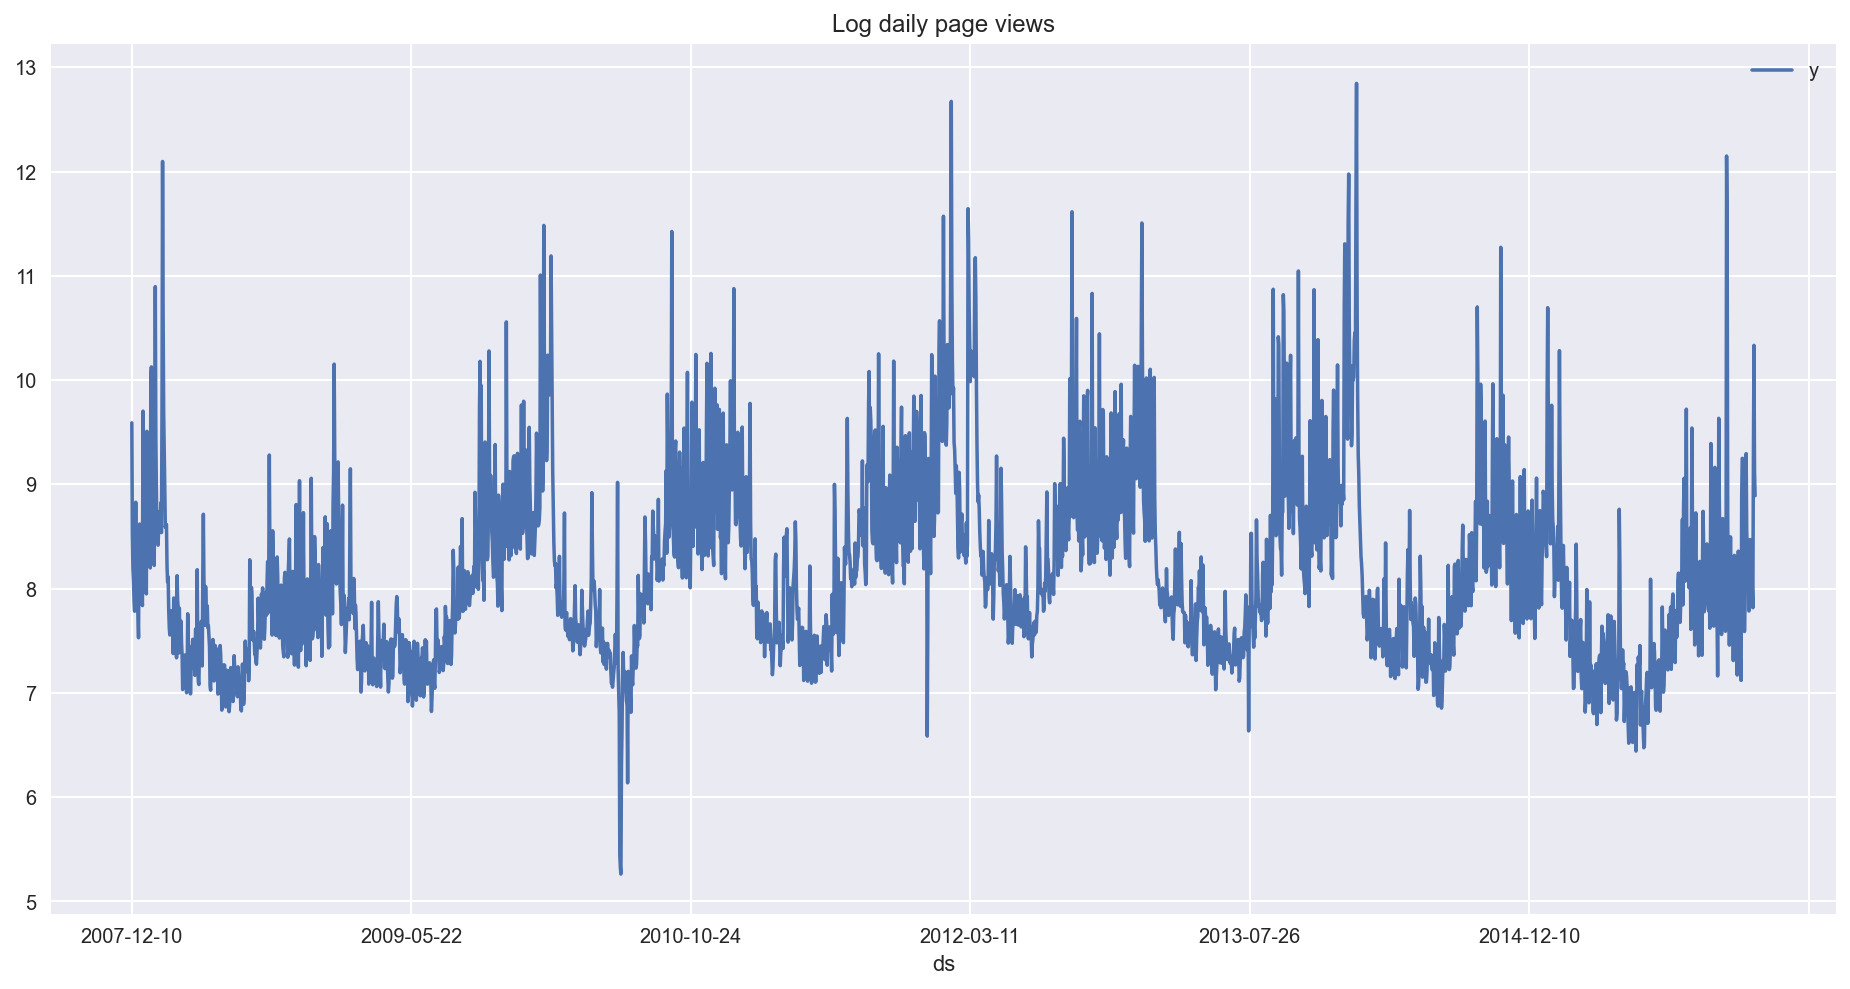

In [4]:
df.plot(x='ds', y='y', title='Log daily page views');

In [5]:
# getting the train/test split
test_length = 365
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

## Facebook's Prophet

In [6]:
prophet_model = Prophet()
prophet_model.fit(df_train)
future_df = prophet_model.make_future_dataframe(periods=test_length)
preds_df_1 = prophet_model.predict(future_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


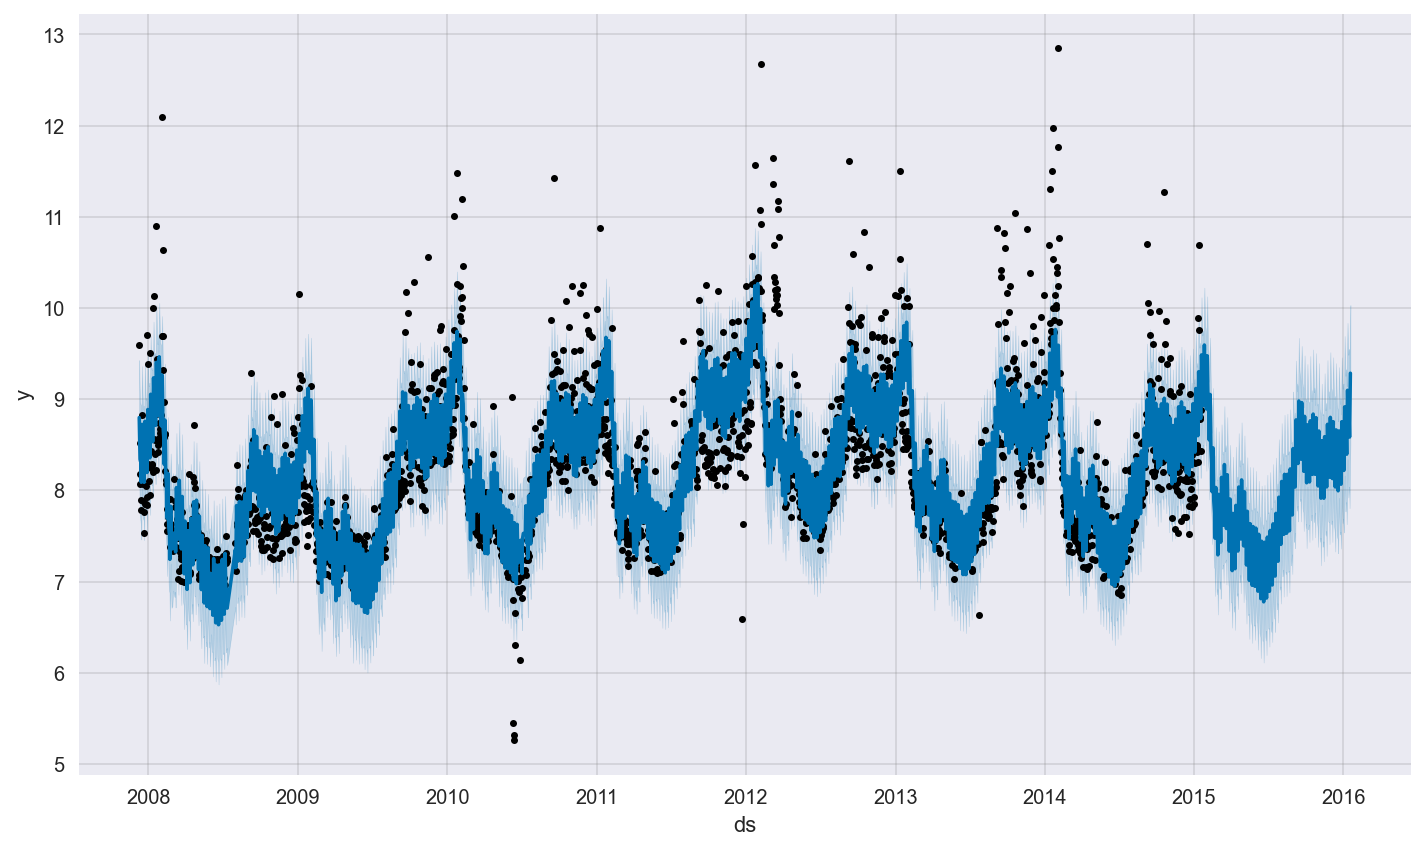

In [7]:
prophet_model.plot(preds_df_1);

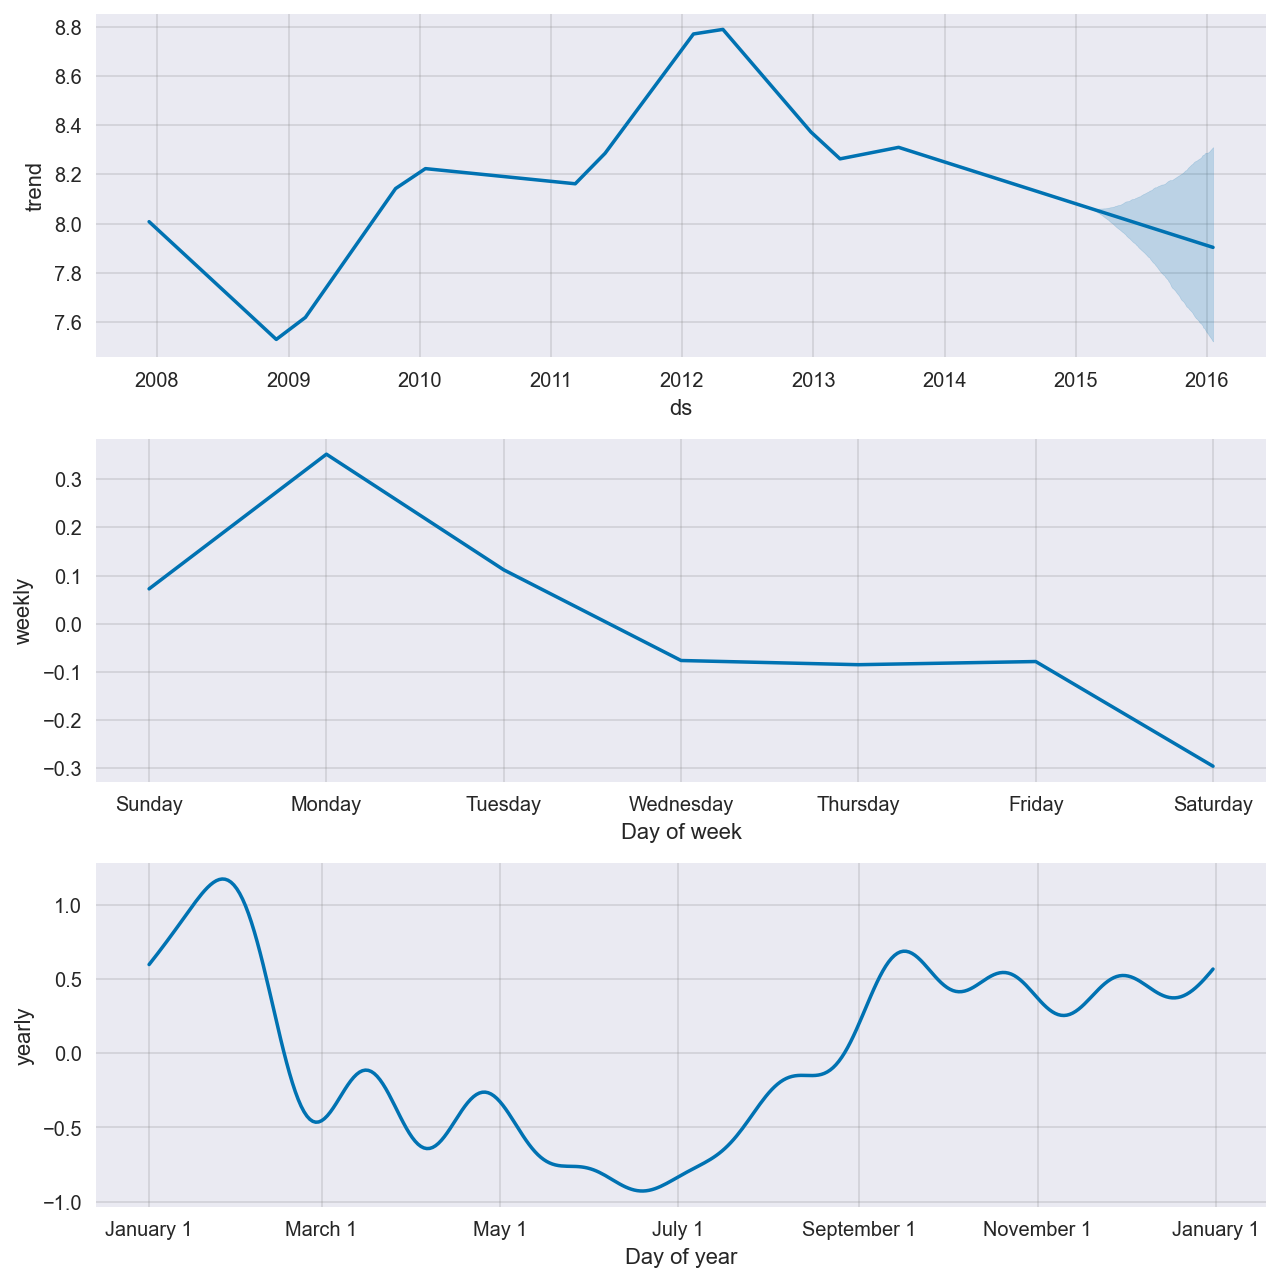

In [8]:
prophet_model.plot_components(preds_df_1);

## NeuralProphet

In [9]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit(df_train, freq="D")
future_df = nprophet_model.make_future_dataframe(df_train, 
                                                 periods = test_length, 
                                                 n_historic_predictions=len(df_train))
preds_df_2 = nprophet_model.predict(future_df)

/Users/elewinson/Documents/eryk_private/erykml/medium_articles/medium/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO:nprophet.config:Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 25
INFO:nprophet.config:Auto-set epochs to 25


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
INFO:nprophet:learning rate range test found optimal lr: 2.31E-01
Epoch[25/25]: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s, SmoothL1Loss=0.00534, MAE=0.363, RegLoss=0]


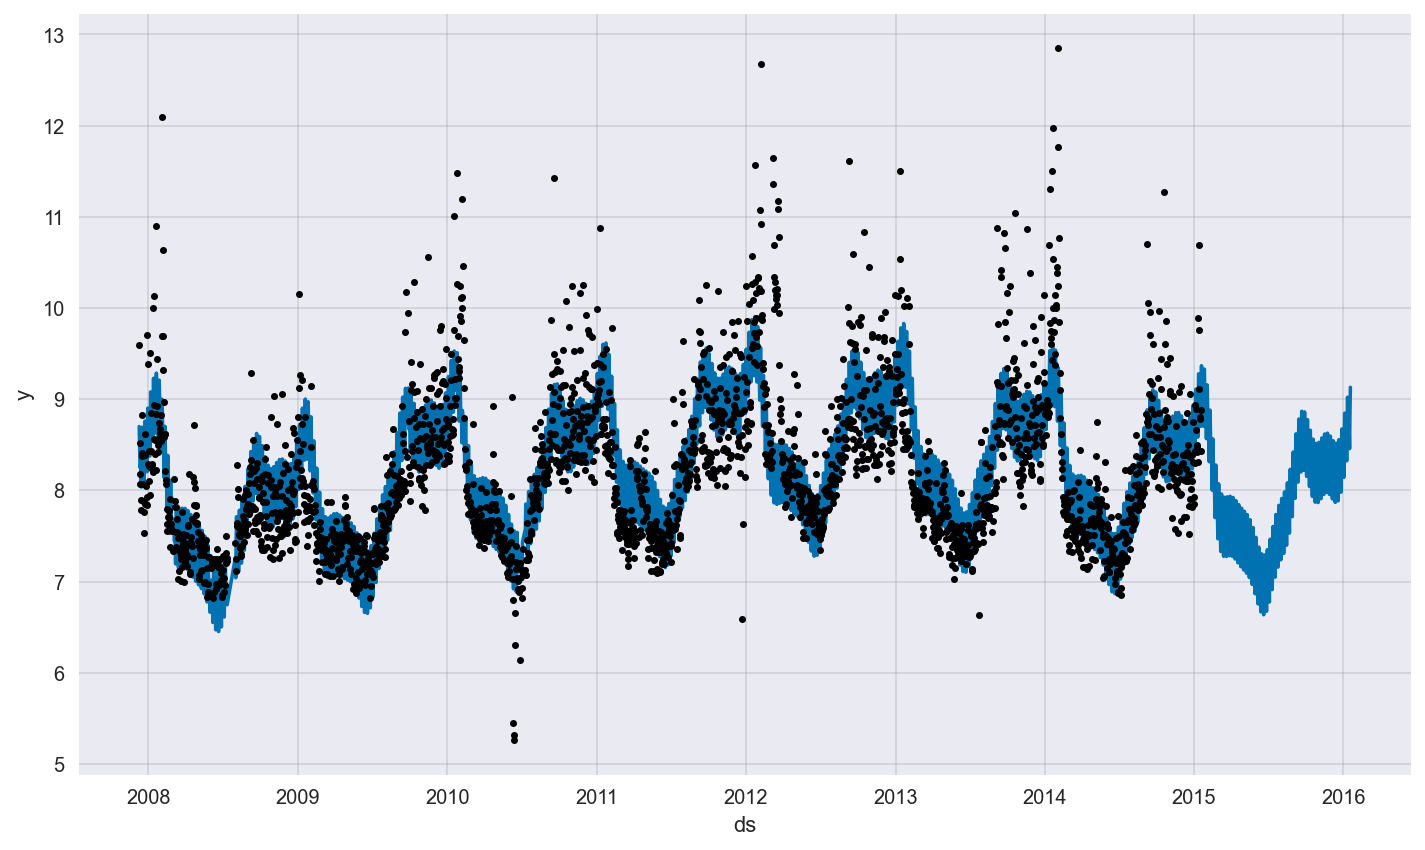

In [10]:
 nprophet_model.plot(preds_df_2);

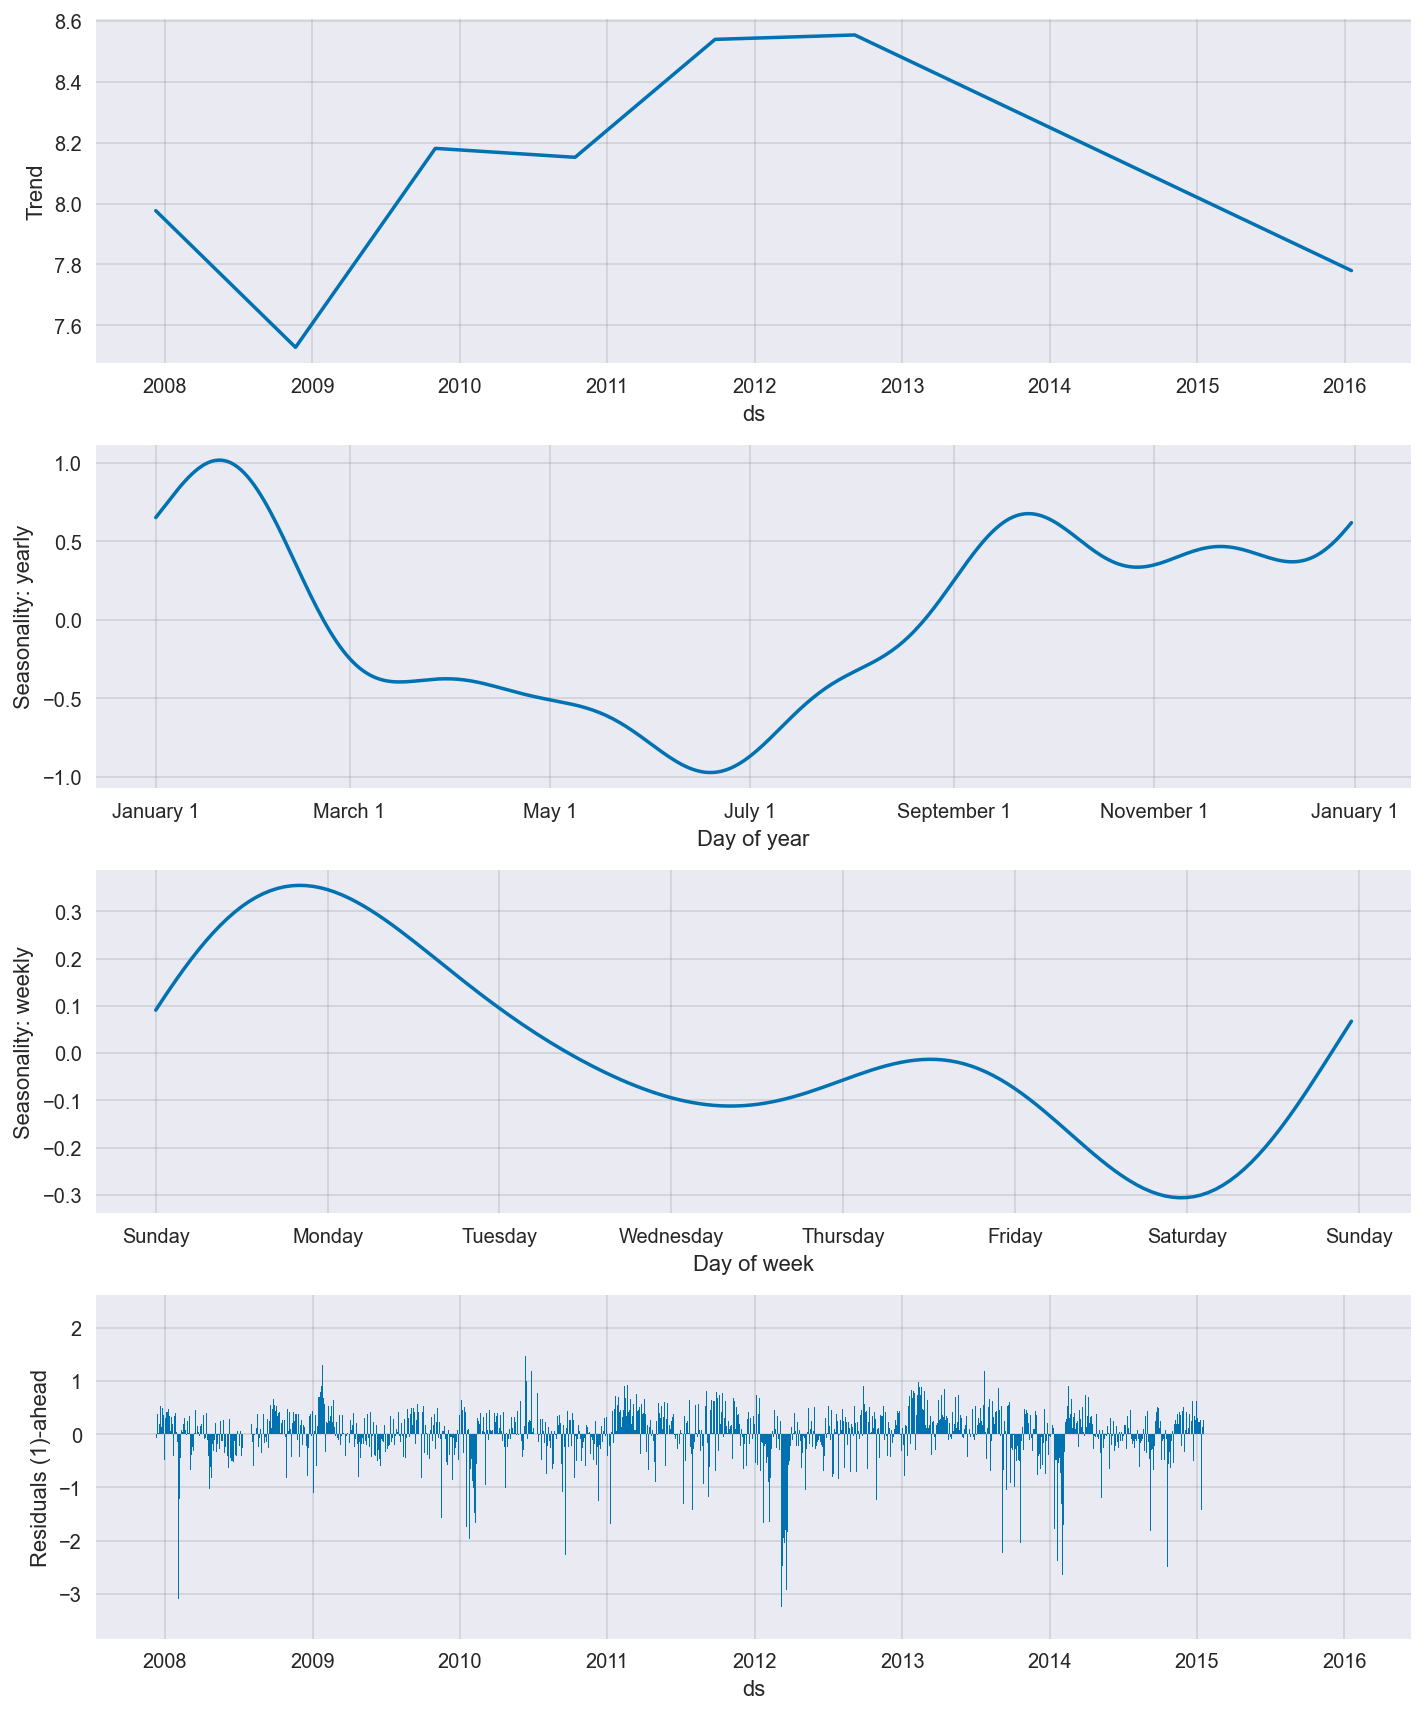

In [11]:
nprophet_model.plot_components(preds_df_2, residuals=True);

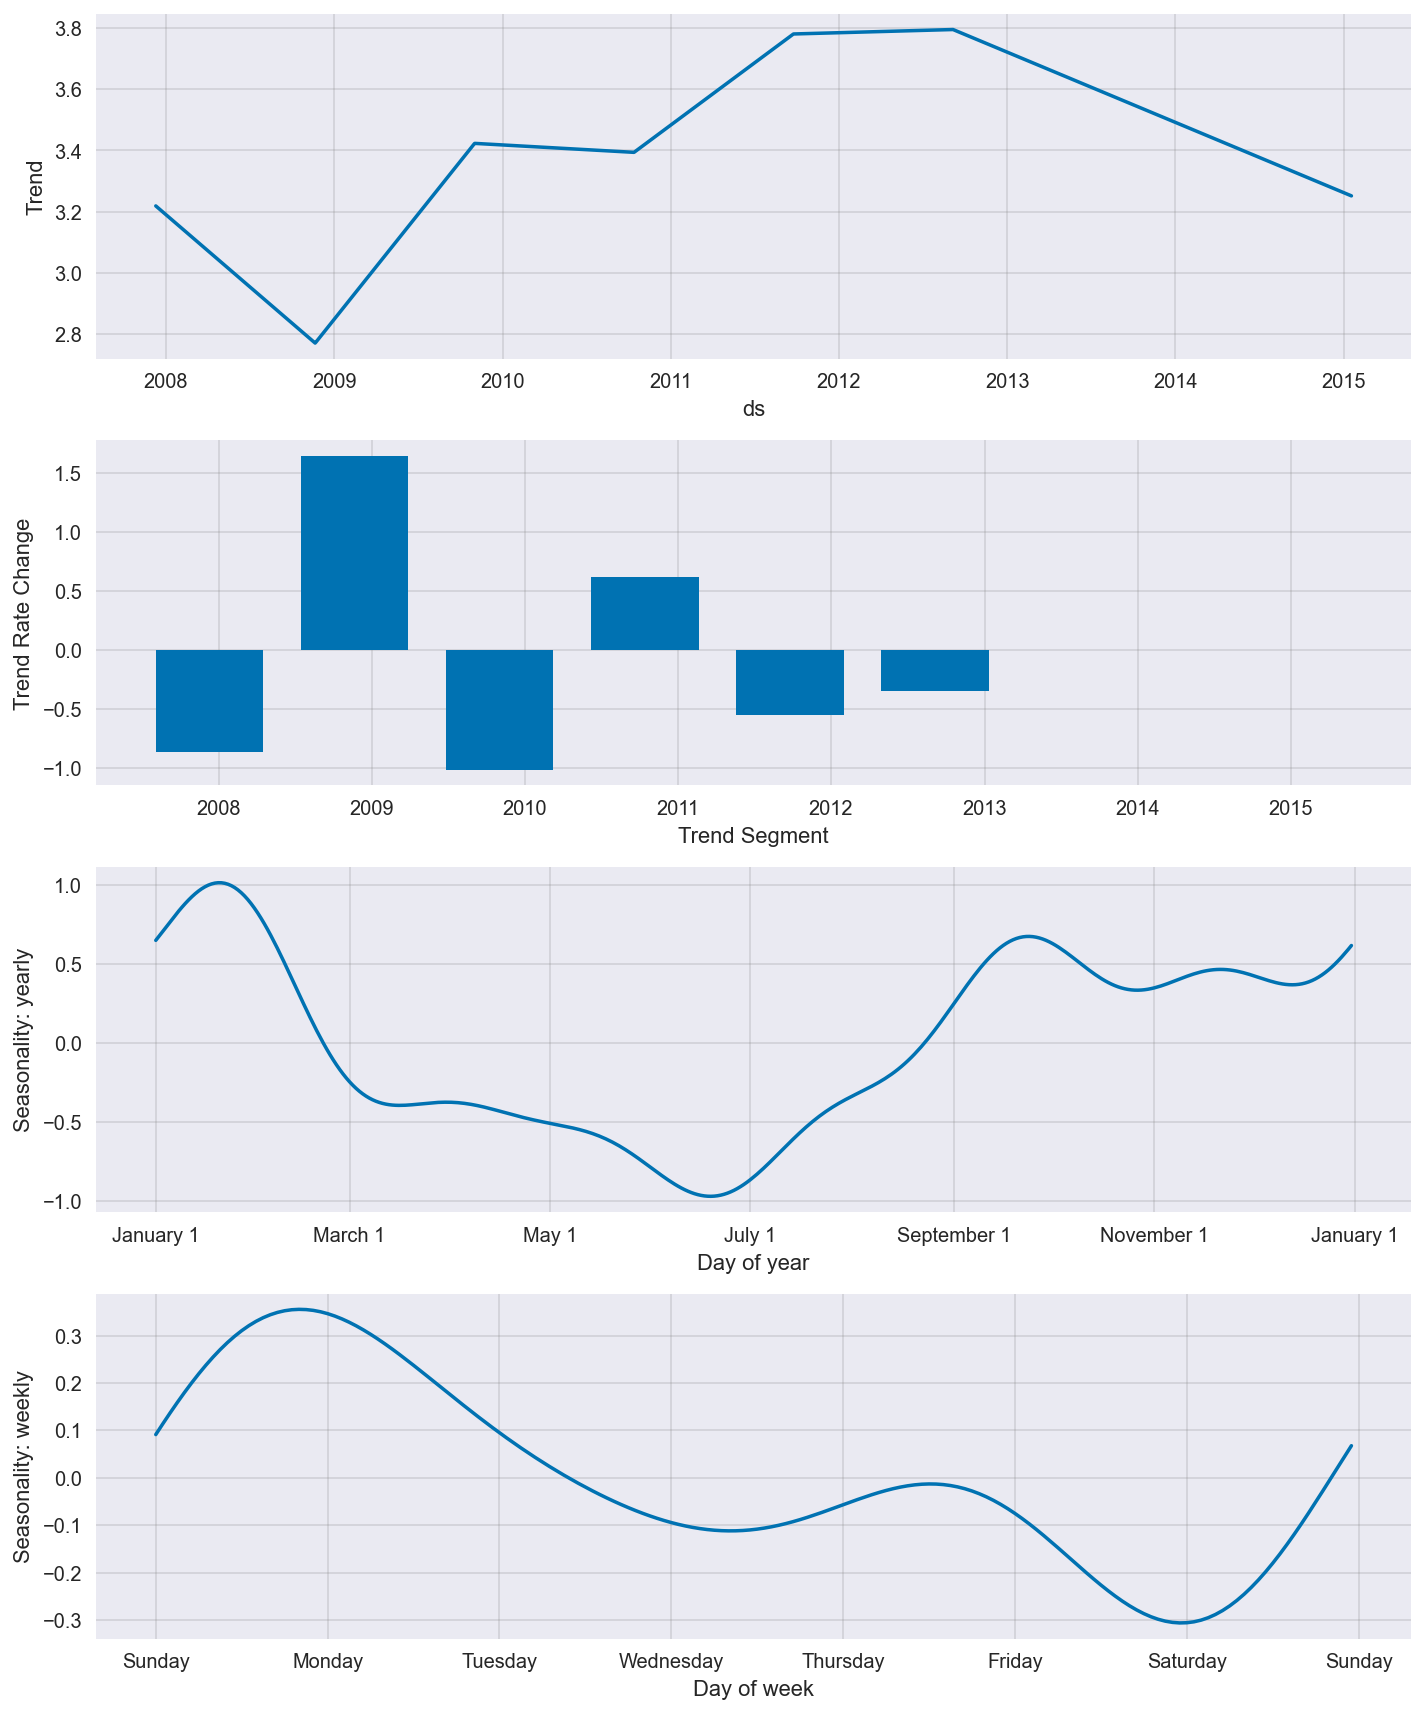

In [12]:
nprophet_model.plot_parameters();

## Performance comparison

<ipython-input-13-9e2edcf05669>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prophet'] = preds_df_1.iloc[-test_length:].loc[:, 'yhat']
<ipython-input-13-9e2edcf05669>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['neural_prophet'] = preds_df_2.iloc[-test_length:].loc[:, 'yhat1']


MSE comparison ----
Prophet:	0.3576
NeuralProphet:	0.3135


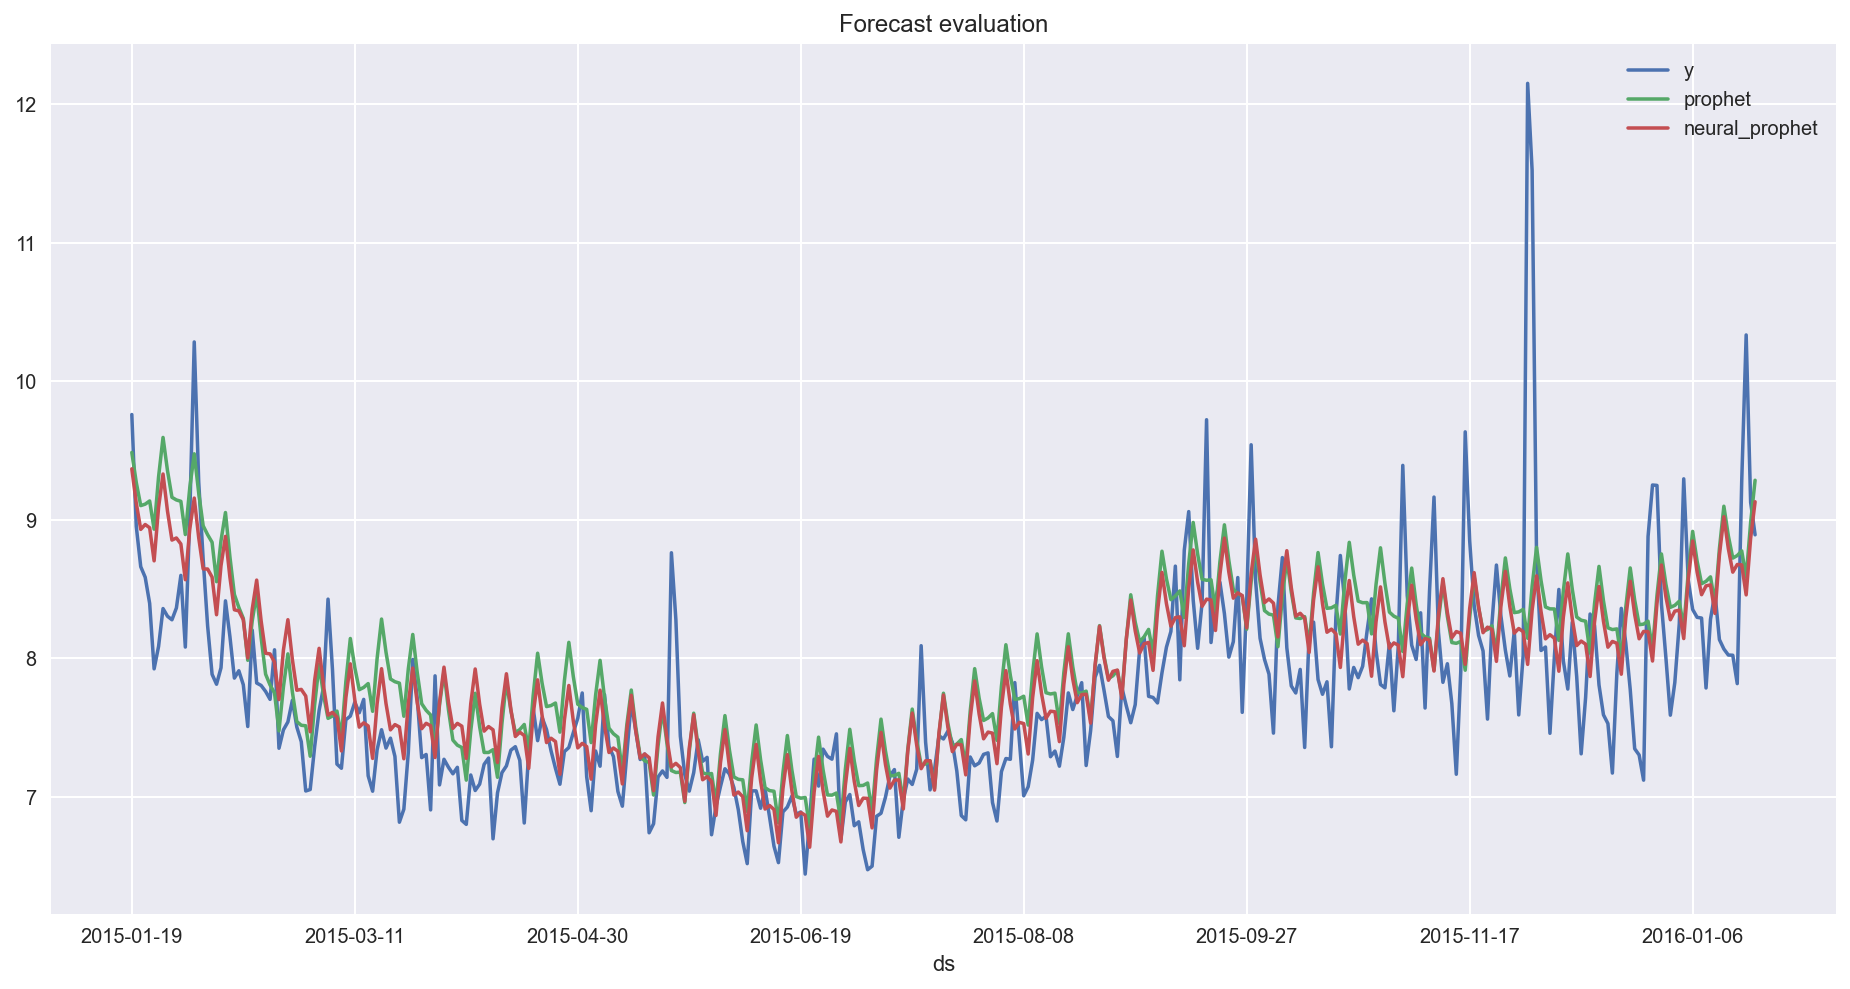

In [13]:
# I know about chained indexing here, but it was just faster and more elegant then using iloc and column index

# prepping the DataFrame
df_test['prophet'] = preds_df_1.iloc[-test_length:].loc[:, 'yhat']
df_test['neural_prophet'] = preds_df_2.iloc[-test_length:].loc[:, 'yhat1']
df_test.set_index('ds', inplace=True)

print('MSE comparison ----')
print(f"Prophet:\t{mean_squared_error(df_test['y'], preds_df_1.iloc[-test_length:]['yhat']):.4f}")
print(f"NeuralProphet:\t{mean_squared_error(df_test['y'], preds_df_2.iloc[-test_length:]['yhat1']):.4f}")

df_test.plot(title='Forecast evaluation');